<a href="https://colab.research.google.com/github/kpandey1012/deep_learning/blob/main/Simple_CNN_MNIST_Classifying_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import MNIST digit DATA

In [1]:
import tensorflow 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(10000, 28, 28)


In [4]:
print(x_train[0].shape)

(28, 28)


## View random image using matplotlib

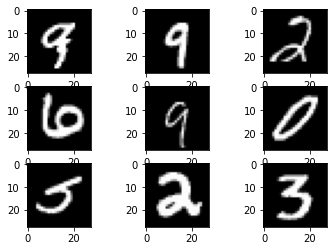

In [5]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(0, 9):
  plt.subplot(331+i)
  random_num = np.random.randint(0,len(x_train))
  img = x_train[random_num]
  plt.imshow(img, cmap = plt.get_cmap('gray'))

plt.show()




## Prepare dataset for traning

In [6]:
img_row = x_train[0].shape[0]
img_col = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0],img_row,img_col,1)
x_test = x_test.reshape(x_test.shape[0],img_row,img_col,1)

inpput_shape = (img_row, img_col, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(f'x_traing shape: {x_train.shape}')
print(f'{x_train.shape[0]} training sample')
print(f'{x_test.shape[0]} test sample')


x_traing shape: (60000, 28, 28, 1)
60000 training sample
10000 test sample


## onehot encoding

In [7]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_test =  tf.keras.utils.to_categorical(y_test)
num_class = len(y_train[0].shape)

In [8]:
num_class = y_train.shape[1]
num_class

10

In [9]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape= inpput_shape))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_class, activation ='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                        

In [10]:
batch_size = 128
epochs = 20
history = model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 14s 8ms/step - loss: 0.2188 - accuracy: 0.9332 - val_loss: 0.0613 - val_accuracy: 0.9823
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0654 - accuracy: 0.9803 - val_loss: 0.0475 - val_accuracy: 0.9858
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0454 - val_accuracy: 0.9869
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0368 - accuracy: 0.9882 - val_loss: 0.0401 - val_accuracy: 0.9903
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0369 - val_accuracy: 0.9897
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0227 - accuracy: 0.9928 - val_loss: 0.0375 - val_accuracy: 0.9893
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0372 - val_accuracy: 0.9901
Epoch

In [11]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0393 - accuracy: 0.9904
Test loss: 0.039269737899303436
Test accuracy: 0.9904000163078308


In [12]:
%matplotlib inline
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


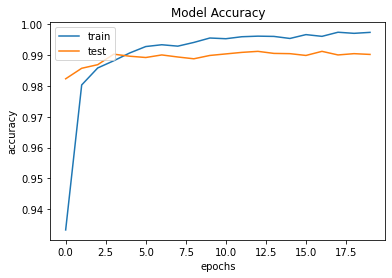

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

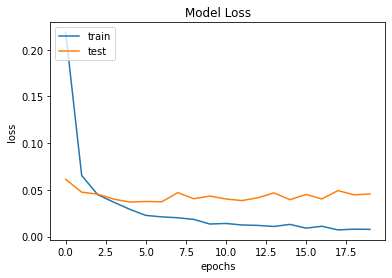

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model.save("mnist_simple_cnn_10_Epochs.h5")

In [18]:
from keras.models import load_model

classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

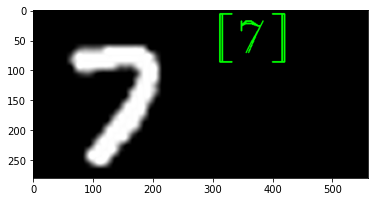

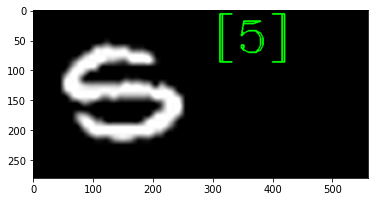

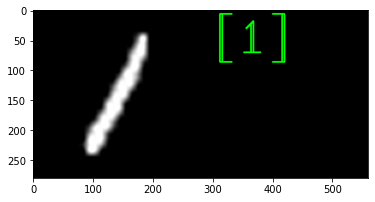

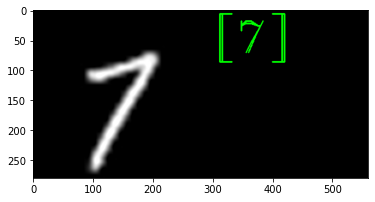

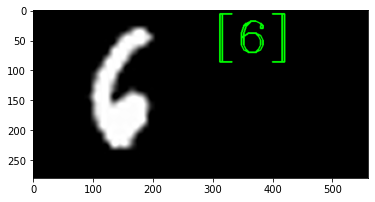

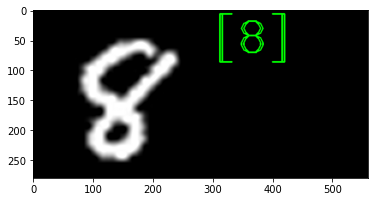

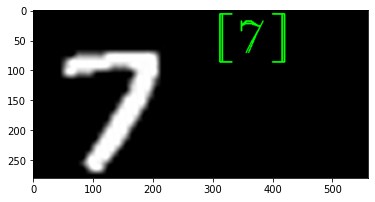

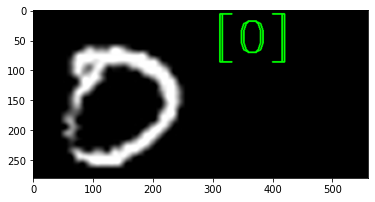

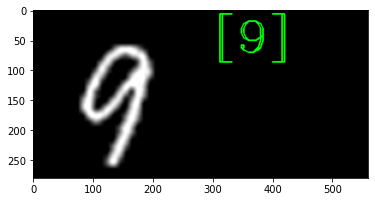

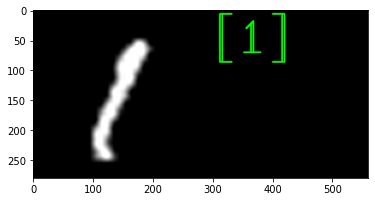

In [23]:
import cv2
import numpy as np


def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (300, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    plt.imshow(expanded_image)
    plt.show()


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
   # res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
    predict_x=classifier.predict(input_im) 
    #classes_x=

    res = np.argmax(predict_x,axis=1)

    draw_test("Prediction", res, imageL)